In [37]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df=pd.read_csv('/content/Spotify Most Streamed Songs.csv')
pd.options.display.float_format = '{:,.0f}'.format
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [41]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [42]:
df.dropna(axis=1,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [44]:
df.columns = df.columns.str.replace('%', '', regex=False)


In [45]:
df['released_year'] = pd.to_numeric(df['released_year']).astype('Int64')
df['released_month'] = pd.to_numeric(df['released_month']).astype('Int64')
df['released_day'] = pd.to_numeric(df['released_day']).astype('Int64')

df['released_date'] = pd.to_datetime(
    dict(year=df['released_year'], month=df['released_month'], day=df['released_day']))

In [46]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_,valence_,energy_,acousticness_,instrumentalness_,liveness_,speechiness_,cover_url,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,Not Found,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...,2023-05-18


In [47]:
df.drop(df[['released_year','released_month','released_day']],axis=1,inplace=True)

In [48]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'].isnull().sum()
df['streams'].fillna(0, inplace=True)
df['streams'].isnull().sum()

<ipython-input-48-26d38d8503cf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['streams'].fillna(0, inplace=True)


0

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'mode',
       'danceability_', 'valence_', 'energy_', 'acousticness_',
       'instrumentalness_', 'liveness_', 'speechiness_', 'cover_url',
       'released_date'],
      dtype='object')

In [51]:
df['artist_count'].value_counts()

,count
artist_count,
1,587
2,254
3,85
4,15
5,5
6,3
8,2
7,2


In [52]:
df['in_spotify_charts'].unique()

array([147,  48, 113, 100,  50,  91,  43,  83,  44,  40,  55, 115,  98,
       130,  77, 104,  68,  26,  38, 110,  87,  19, 101,  78,  34,  88,
        56,  49,  31,  53,  42,  28,  25,  80,  64,  76,  59,  79,  47,
        66,  39,  69,  45,  41,  29,  15,  23,  36,  24,  35,  63,  61,
        62,  20,  30,   9,  17,  12,  46,  52,  58,  27,  21,  32,   6,
        18,  22,  11,  33,  16,   8,  13,   7,  14,  37,  10,   4,   0,
         5,   3,   2,   1])

UNIVARIATE ANALYSIS

In [53]:
df['streams'].describe()
df['streams'].value_counts()
df['streams'].dtype
df['streams']=df['streams'].astype(int)
df['streams'].dtype
df['streams'].describe()

,streams
count,953
mean,"513,597,931"
std,"566,803,887"
min,0
25%,"141,381,703"
50%,"290,228,626"
75%,"673,801,126"
max,"3,703,895,074"


Text(0, 0.5, 'count')

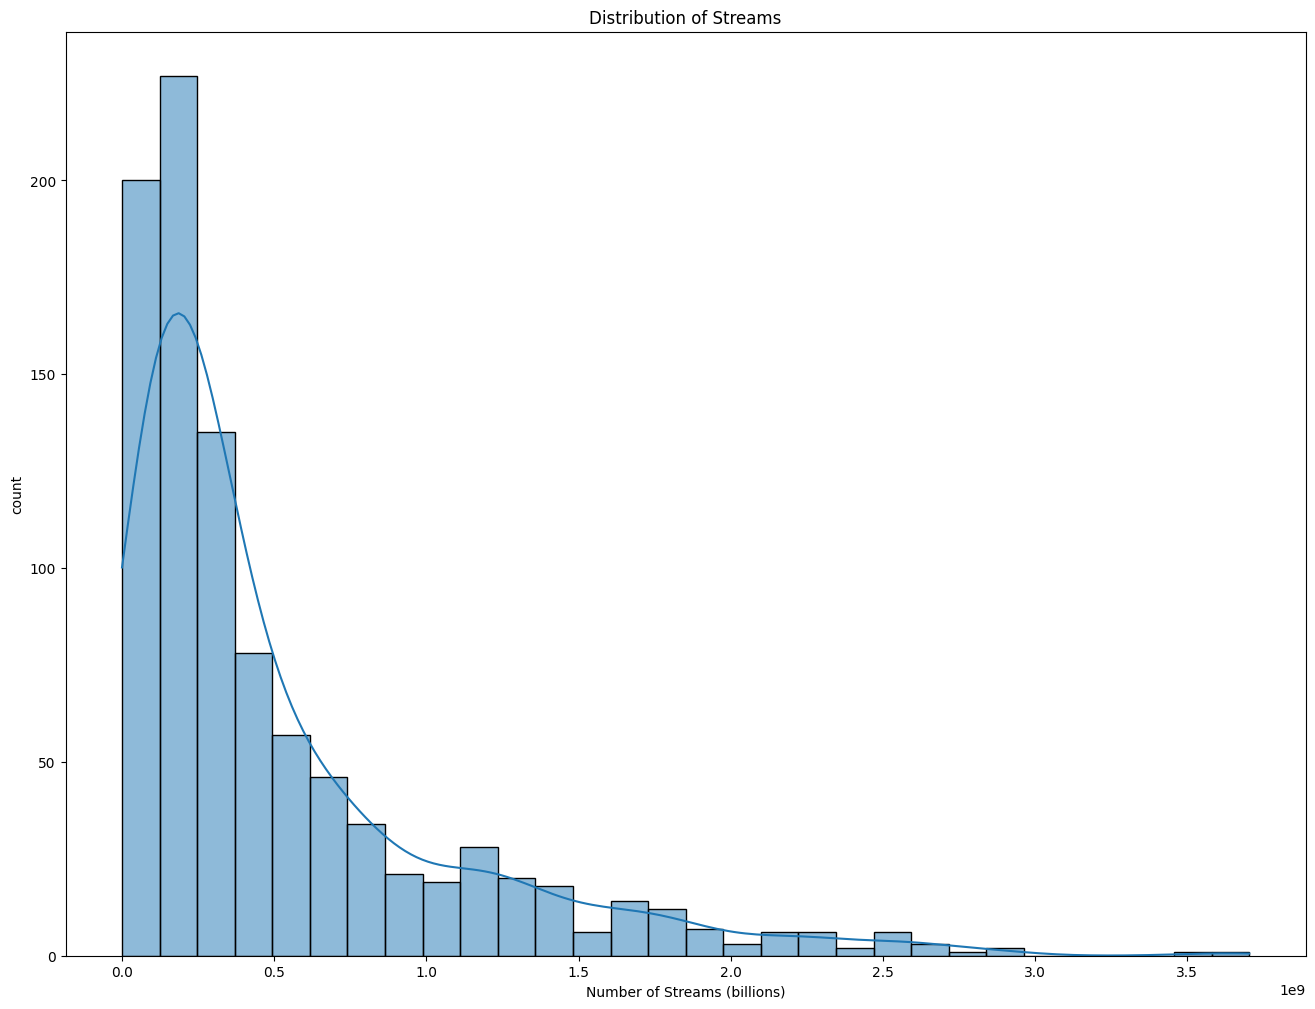

In [54]:
plt.figure(figsize=(16,12))
sns.histplot(df['streams'], bins=30, kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Number of Streams (billions)')
plt.ylabel('count')

In [55]:
df.columns
df['danceability_'].describe()

,danceability_
count,953
mean,67
std,15
min,23
25%,57
50%,69
75%,78
max,96


Text(0, 0.5, 'Frequency')

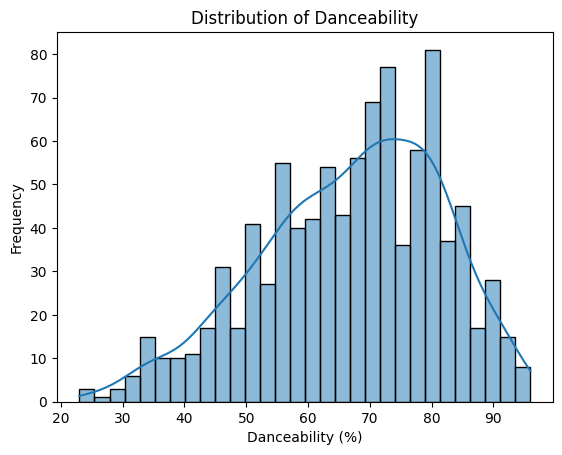

In [56]:
sns.histplot(df['danceability_'], bins=30, kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Frequency')

In [57]:
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

Text(0.5, 1.0, 'Count of Songs by Mode')

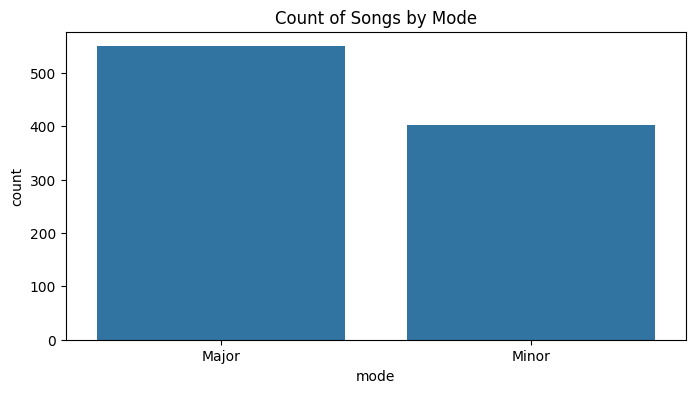

In [58]:
plt.figure(figsize=(8, 4))
sns.countplot(x='mode', data=df)
plt.title('Count of Songs by Mode')

In [59]:
df['energy_'].describe()

,energy_
count,953
mean,64
std,17
min,9
25%,53
50%,66
75%,77
max,97


Text(0, 0.5, 'Frequency')

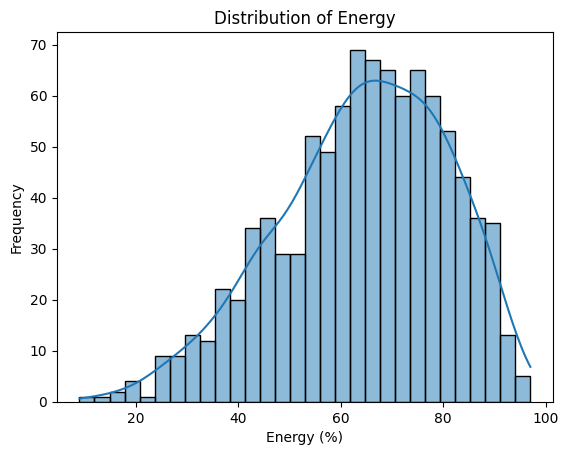

In [60]:
sns.histplot(df['energy_'], bins=30, kde=True)
plt.title('Distribution of Energy')
plt.xlabel('Energy (%)')
plt.ylabel('Frequency')

In [61]:
df['artist_count'].value_counts()

,count
artist_count,
1,587
2,254
3,85
4,15
5,5
6,3
8,2
7,2


Text(0.5, 1.0, ' Number of artists contributing to the song.')

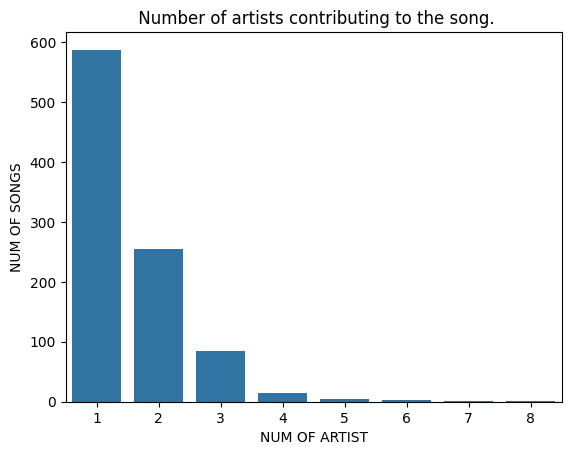

In [62]:
count=df['artist_count'].value_counts().reset_index()
count.columns = ['Artist Count', 'Track Count']
sns.barplot(data=count,x='Artist Count',y='Track Count')
plt.xlabel('NUM OF ARTIST')
plt.ylabel('NUM OF SONGS')
plt.title(' Number of artists contributing to the song.')

BIVARIATE ANALYSIS

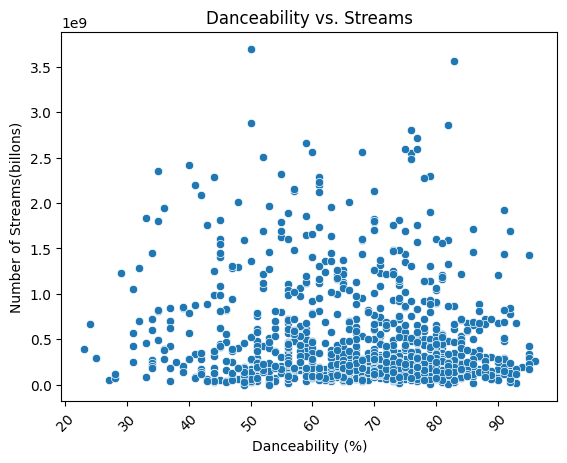

In [63]:
sns.scatterplot(x='danceability_', y='streams', data=df)
plt.xticks(rotation=45)
plt.title('Danceability vs. Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Number of Streams(billons)')
plt.show()

In [64]:
average_streams_by_artist = df.groupby('artist(s)_name')['streams'].mean().sort_values(ascending=False)
average_streams_by_artist.head(10)

,streams
artist(s)_name,
Tones and I,"2,864,791,672"
"Post Malone, Swae Lee","2,808,096,550"
"Drake, WizKid, Kyla","2,713,922,350"
"Justin Bieber, The Kid Laroi","2,665,343,922"
"The Chainsmokers, Halsey","2,591,224,264"
"The Weeknd, Daft Punk","2,565,529,693"
Glass Animals,"2,557,975,762"
"Shawn Mendes, Camila Cabello","2,484,812,918"
"Billie Eilish, Khalid","2,355,719,893"


Text(0.5, 1.0, 'TOP TEN Artist ON STREAM')

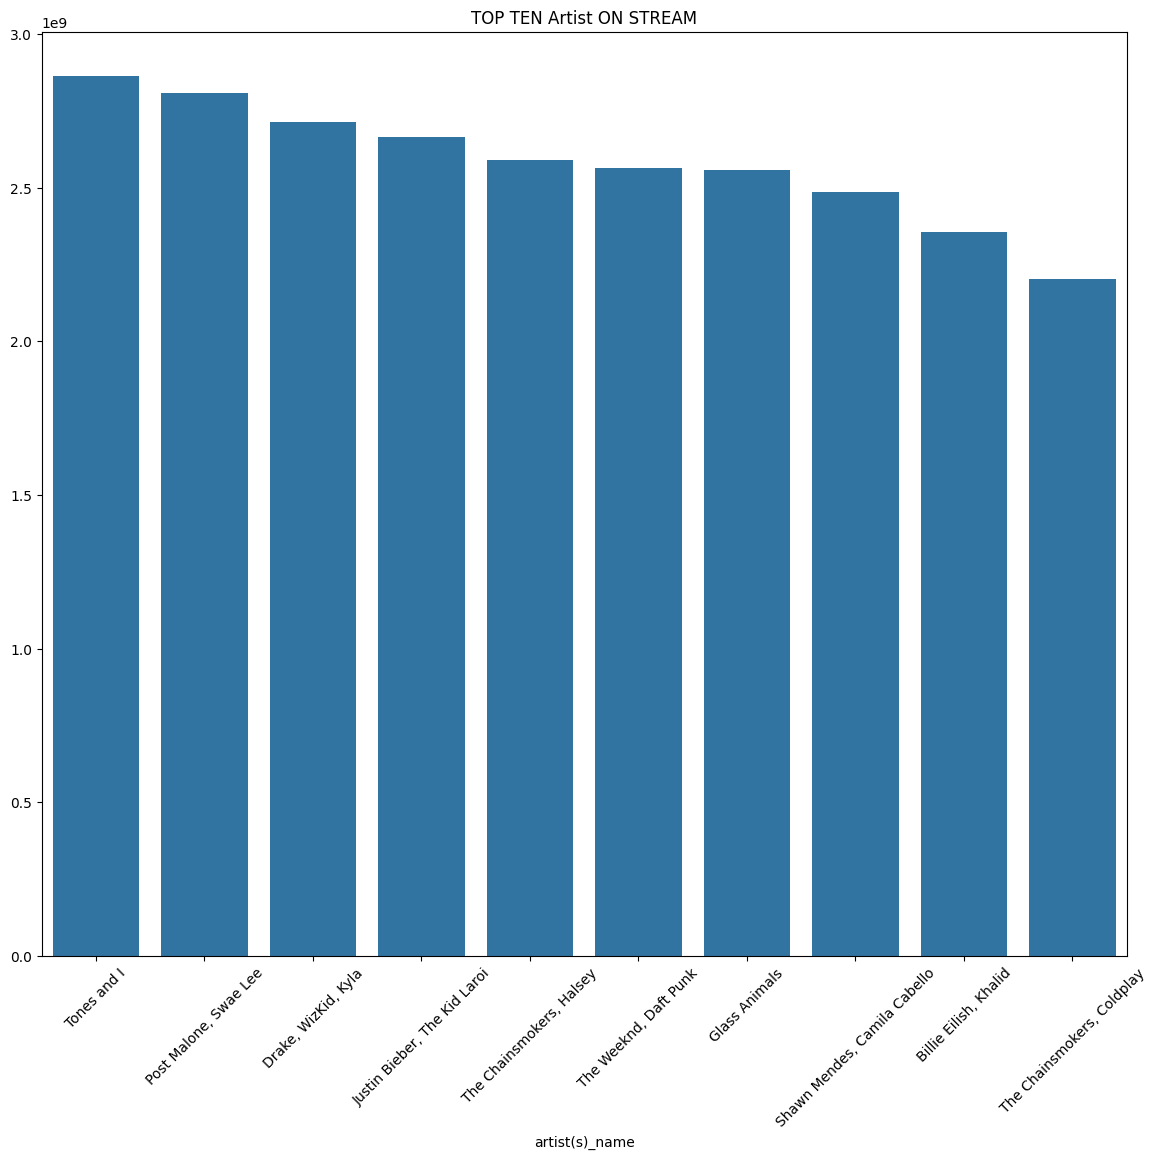

In [65]:
plt.figure(figsize=(14,12))
sns.barplot(x=average_streams_by_artist.head(10).index,y=average_streams_by_artist.head(10).values)
plt.xticks(rotation=45)
plt.title("TOP TEN Artist ON STREAM")

Text(0, 0.5, 'Number of Streams(billons)')

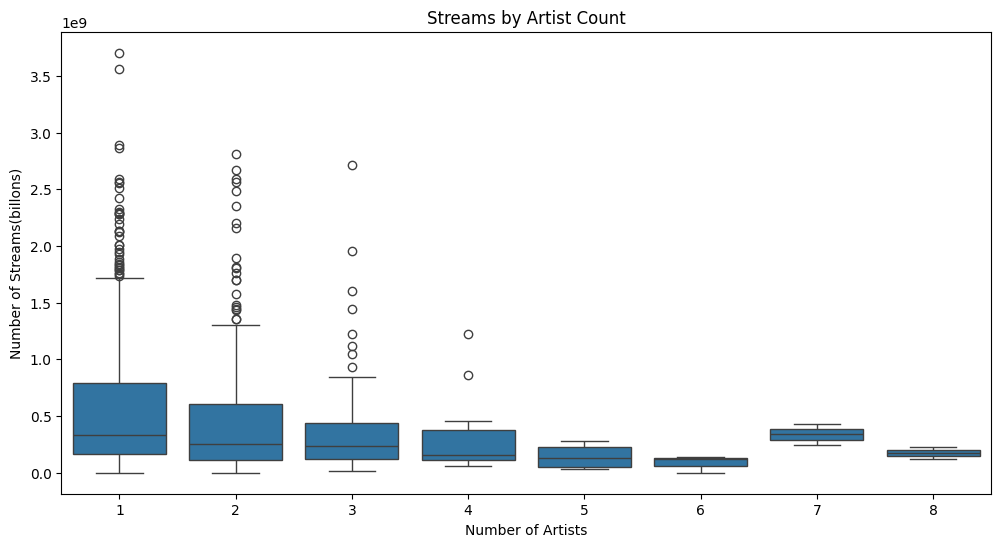

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='artist_count', y='streams', data=df)
plt.title('Streams by Artist Count')
plt.xlabel('Number of Artists')
plt.ylabel('Number of Streams(billons)')

In [67]:
ranks=['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
artist_popularity = df.groupby('artist(s)_name')[ranks].sum().reset_index()
artist_popularity.head()

,artist(s)_name,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
0,(G)I-DLE,266983330,881,24,79
1,"21 Savage, Gunna",60680939,807,3,5
2,"24kgoldn, Iann Dior",1699402402,12854,237,636
3,50 Cent,1202722675,30427,235,"5,221"
4,"A$AP Rocky, Metro Boomin, Roisee",94186466,727,17,28


In [68]:
artist_popularity.dtypes
artist_popularity['in_deezer_playlists'] = pd.to_numeric(artist_popularity['in_deezer_playlists'], errors='coerce')
artist_popularity['total_streams'] = artist_popularity[['streams','in_spotify_playlists','in_apple_playlists','in_deezer_playlists']].sum(axis=1)
artist_popularity

,artist(s)_name,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,total_streams
0,(G)I-DLE,266983330,881,24,79,"266,984,314"
1,"21 Savage, Gunna",60680939,807,3,5,"60,681,754"
2,"24kgoldn, Iann Dior",1699402402,12854,237,636,"1,699,416,129"
3,50 Cent,1202722675,30427,235,NaN,"1,202,753,337"
4,"A$AP Rocky, Metro Boomin, Roisee",94186466,727,17,28,"94,187,238"
...,...,...,...,...,...,...
640,j-hope,155795783,565,6,11,"155,796,365"
641,"j-hope, J. Cole",116599790,615,22,8,"116,600,435"
642,sped up 8282,103762518,472,0,6,"103,762,996"
643,"sped up nightcore, ARIZONATEARS, Lil Uzi Vert",207033255,1638,0,21,"207,034,914"


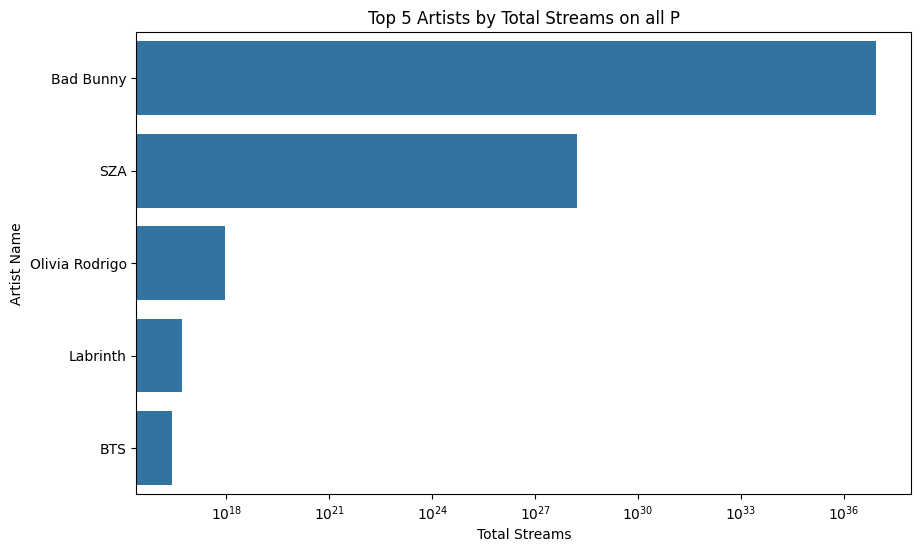

In [69]:
top_artists = artist_popularity.nlargest(5, 'total_streams')

plt.figure(figsize=(10, 6))
sns.barplot(x='total_streams', y='artist(s)_name',data=top_artists)
plt.title('Top 5 Artists by Total Streams on all P')
plt.xlabel('Total Streams')
plt.xscale('log')
plt.ylabel('Artist Name')
plt.show()

In [70]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,mode,danceability_,valence_,energy_,acousticness_,instrumentalness_,liveness_,speechiness_,cover_url,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,Major,80,89,83,31,0,8,4,Not Found,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...,2023-05-18


CORRELATION

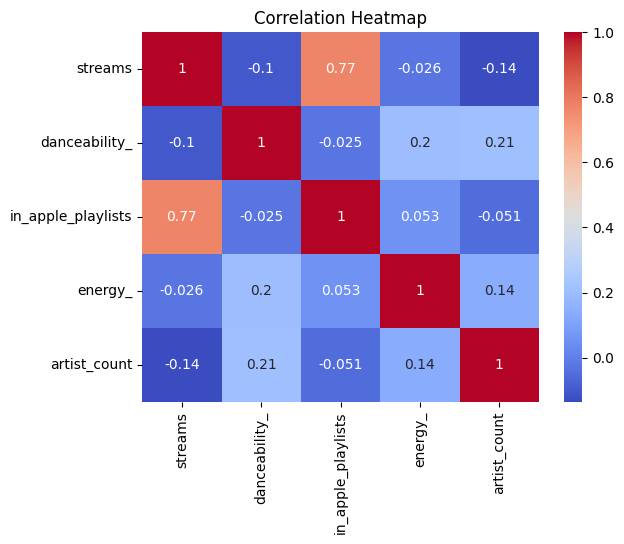

In [71]:
correlation = df[['streams','danceability_','in_apple_playlists','energy_','artist_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()